# Objective

The objective in telecom customer churn analysis is to predict whether a customer will discontinue service based on historical data. This helps identify at-risk customers, allowing the company to take proactive measures to retain them. The ultimate goal is to reduce churn rates and improve customer retention.


# Steps Involved to predict Telecom customer churn

importing Libraries

Loading Dataset

Exploratory Data Analysis

Outliers using IQR method

Cleaning and Transforming data

Prediction using Logistic Regression


using support vector classifier

using decision tree

using Knn

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

d:\Users\nikhi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Importing the dataset

In [2]:
df = pd.read_csv(r"C:\Users\nikhi\Downloads\Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory data analysis

In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Data Cleaning

In [10]:
df['TotalCharges'].dtype

dtype('O')

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [12]:
df['TotalCharges'].dtype

dtype('float64')

As the TotalCharges column is in object data type here i have converted to float data type

In [13]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Separating numeriacl, categorical, Target variable columns

In [14]:
categorical_features = [
    "gender",
     "SeniorCitizen",
     "partner",
      "Dependents",
      "PhoneService",
      "MultipleLines",
      "InternetService",
      "OnlineSecurity",
      "OnlineBackup",
       "DeviceProtection",
      "TechSupport",
      "StreamingTV",
      "StreamingMovies",
      "Contract",
       "PaperlessBilling",
      "PaymentMethod",
       
]
numerical_features = ["tenure","MonthlyCharges","TotalCharges"]
target = "churn"

In [15]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


## Line plot of numerical columns

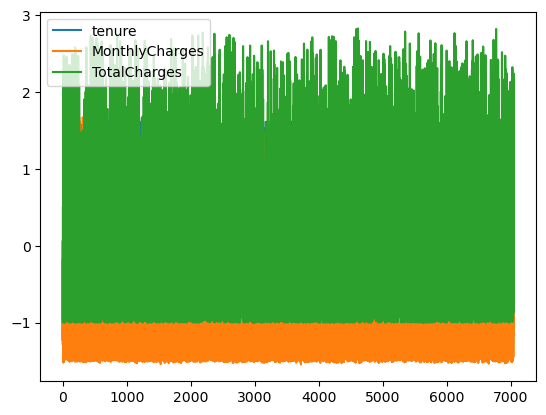

In [56]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].plot(kind='line')
plt.show()

## Count plot of Categorical Features

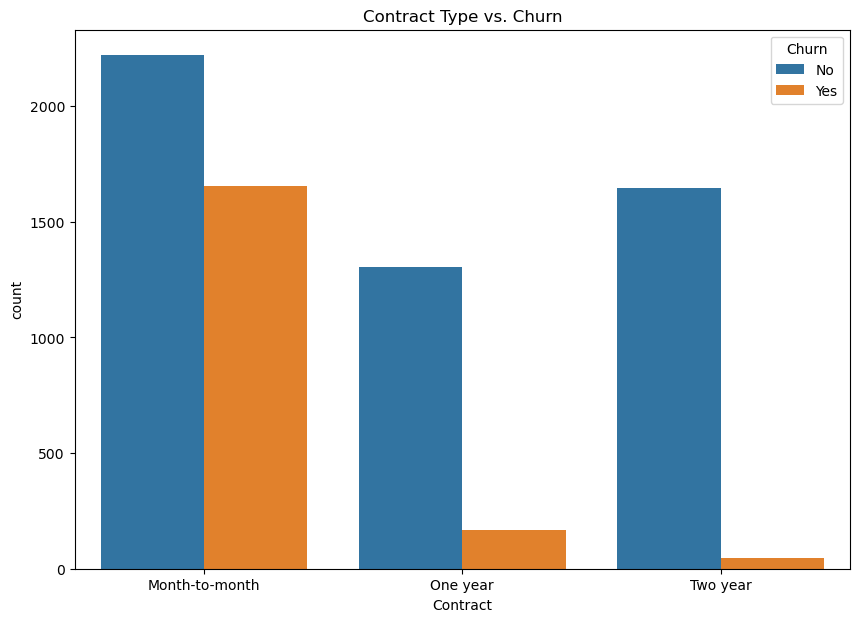

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(data = df,x = "Contract" , hue = "Churn")
plt.title('Contract Type vs. Churn')
plt.show()

## Box plot of monthly charges and churn

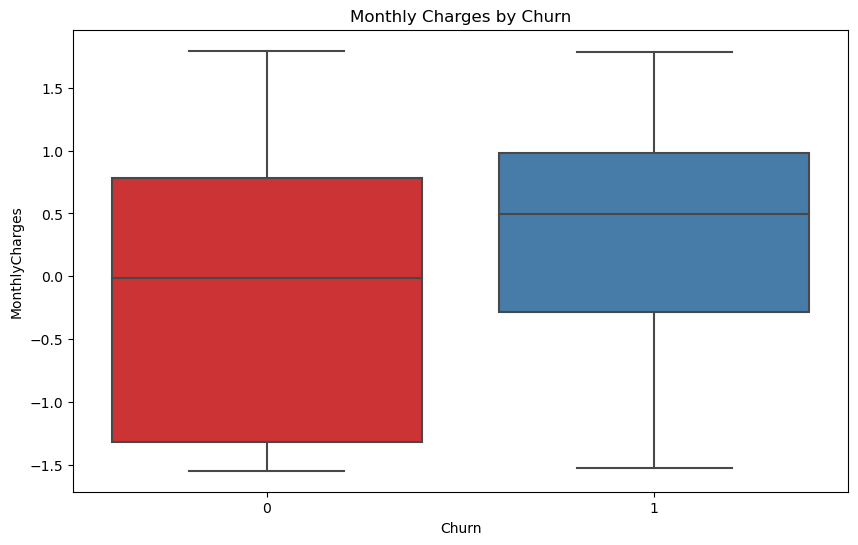

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')
plt.title('Monthly Charges by Churn')
plt.show()


## Churn Rate by Internet Service Type

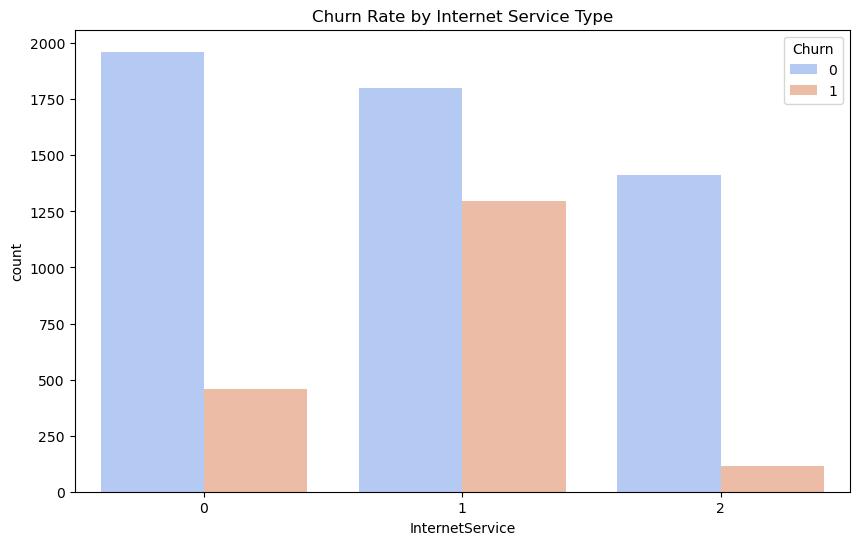

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn Rate by Internet Service Type')
plt.show()


Text(0.5, 1.0, 'Churned')

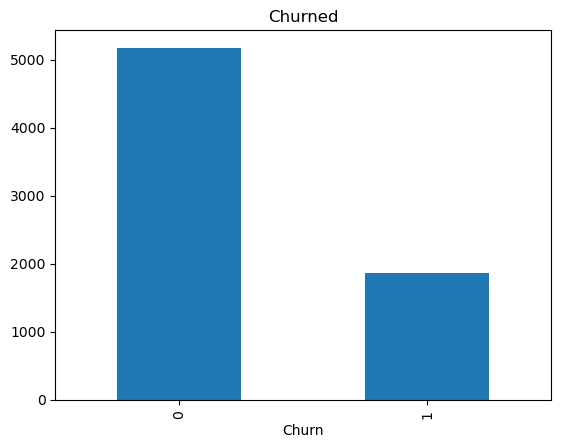

In [59]:
df["Churn"].value_counts().plot(kind = 'bar').set_title('Churned')

In [31]:
corr_matrix = df.corr()

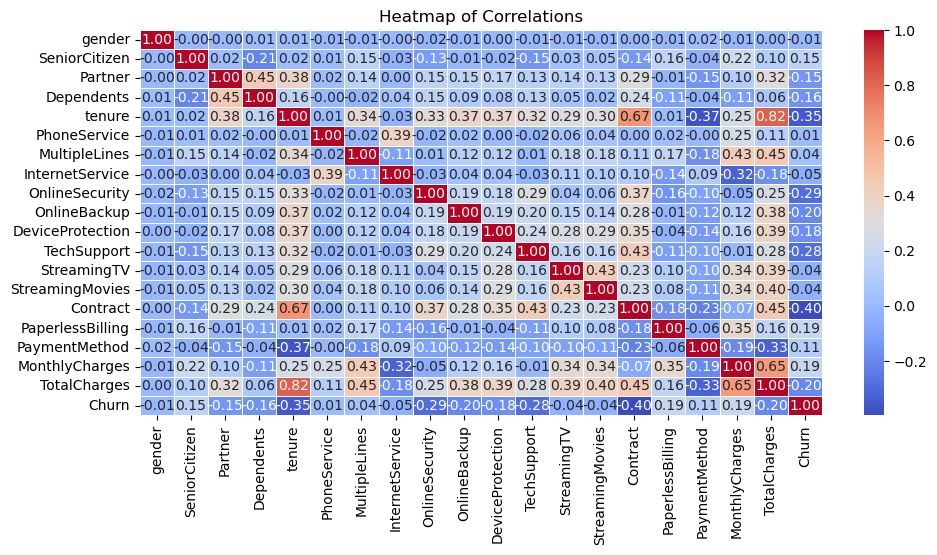

In [34]:
plt.figure(figsize=(11, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

## Cleaning and Transforming data

In [16]:
df.drop('customerID',axis = 1,inplace = True)

In [17]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Label Encoder

we use label encoder to convert the categorical data to numerical data

In [18]:
from sklearn.preprocessing import LabelEncoder

for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','OnlineBackup', 'PaymentMethod','Churn']:
    df[column] = LabelEncoder().fit_transform(df[column])


In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Filling Missing values

To fill the missing values we use Simpleimputaion technique

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
impute = SimpleImputer(strategy='mean')
df['TotalCharges'] = impute.fit_transform(df[['TotalCharges']])
df['TotalCharges'].isna().sum()

0

In [23]:
df.shape

(7043, 20)

## Feature Scaling

we use feature scaling to keep all the values in same range

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
df[numerical_columns].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193


## Train Test Split

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score,roc_curve


In [27]:
x = df.drop("Churn",axis = 1 )
y = df['Churn']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=23)

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_predct = random_forest.predict(x_test)

print("Random Forest Metrics:")
print(f"Accuracy:{accuracy_score(y_test,y_predct):.2f}")
print(f"Precision:{precision_score(y_test,y_predct):.2f}")
print(f"Recall:{recall_score(y_test,y_predct):.2f}")
print(f"F1 Score:{f1_score(y_test,y_predct):.2f}")


Random Forest Metrics:
Accuracy:0.80
Precision:0.64
Recall:0.50
F1 Score:0.56


The performance metrics of the Random Forest model indicate the following:

Accuracy (0.80) suggests that the model correctly predicts customer churn or retention 80% of the time.
Precision (0.64) indicates that when the model predicts churn, it is correct 64% of the time.
Recall (0.50) shows that the model identifies only 50% of the actual churned customers, implying some churned customers are missed.
F1 Score (0.56), a balance between precision and recall, is moderate, indicating there is room for improvement in the model's ability to correctly classify churned customers.
Overall, while accuracy is high, the lower recall and F1 score suggest that the model struggles with detecting all churn cases.

## Logistic Regression

In [42]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_predct= log_reg.predict(x_test)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predct):.2f}")
print(f"Precision: {precision_score(y_test, y_predct):.2f}")
print(f"Recall: {recall_score(y_test, y_predct):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predct):.2f}")


Logistic Regression Metrics:
Accuracy: 0.81
Precision: 0.66
Recall: 0.54
F1 Score: 0.59


Even for logistic regression the accuracy score is more desiarable 

## KNN 

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predct= knn.predict(x_test)

# Evaluate the model
print("K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predct):.2f}")
print(f"Precision: {precision_score(y_test, y_predct):.2f}")
print(f"Recall: {recall_score(y_test, y_predct):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predct):.2f}")

K-Nearest Neighbors Metrics:
Accuracy: 0.76
Precision: 0.54
Recall: 0.47
F1 Score: 0.50


## Decision Tree

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predct = dt.predict(x_test)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predct):.2f}")
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_predct))

Decision Tree Metrics:
Accuracy: 0.74


## Probability Estimates and ROC Curve

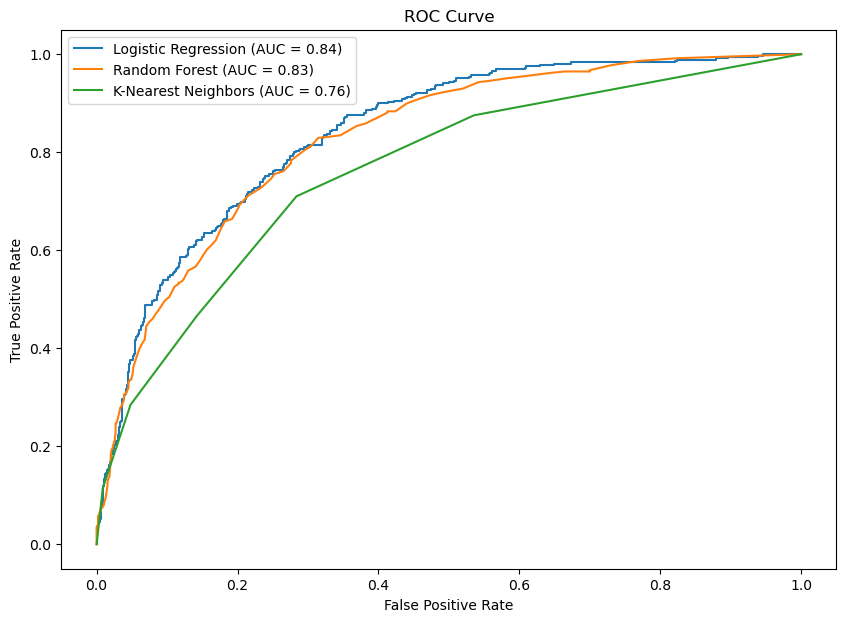

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
y_prob_log_reg = log_reg.predict_proba(x_test)[:, 1]
y_prob_rf = random_forest.predict_proba(x_test)[:, 1]
y_prob_knn = knn.predict_proba(x_test)[:, 1]

# Plot ROC Curve
def plot_roc_curve(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_prob):.2f})')

plt.figure(figsize=(10, 7))
plot_roc_curve(y_test, y_prob_log_reg, 'Logistic Regression')
plot_roc_curve(y_test, y_prob_rf, 'Random Forest')
plot_roc_curve(y_test, y_prob_knn, 'K-Nearest Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Conclusion

Logistic Regression performs the best with the highest accuracy (0.81), precision (0.66), and recall (0.54), making it the most balanced model.

Random Forest has strong accuracy (0.80) but lower recall (0.50), meaning it misses some churned customers.
K-Nearest Neighbors (KNN) shows weaker performance with lower accuracy (0.76) and F1 score (0.50), indicating it struggles with churn prediction.

Decision Tree has the lowest accuracy (0.74), making it the least effective model in this analysis.

Logistic Regression is the most reliable model for predicting customer churn based on this evaluation.

Further tuning of Random Forest could improve recall and overall performance.
